In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [84]:
bench = pd.read_csv('results/GEP/baseline.csv', index_col=0)
MIMO_full = pd.read_csv('results/GEP/fulldata10_LSTM.csv', index_col=0)
LSTM_global = pd.read_csv('results/GEP/global/fulldata_LSTM.csv', index_col=0)
#MIMO = pd.read_csv('results/GEP/LSTM_MIMO10.csv', index_col=0)
condRNN = pd.read_csv('results/GEP/ConditionalRNN10_sequential.csv', index_col=0)
datasets = [condRNN, MIMO_full, LSTM_global, bench]

In [85]:
#temp = temp.drop(temp.index[:1]).reset_index(drop=True)
#MIMO = MIMO.drop(MIMO.index[:1]).reset_index(drop=True)
MIMO_full = MIMO_full.drop(MIMO_full.index[:1]).reset_index(drop=True)
condRNN = condRNN.drop(condRNN.index[:1]).reset_index(drop=True)
datasets = [condRNN, MIMO_full, LSTM_global, bench]

In [86]:
LSTM_global

,mae,mape,rmse,B
0,6.162297,22.474525,8.909026,0.0
1,13.254024,127.945278,19.798121,1.0
2,3.886339,22.134315,5.823375,2.0


In [91]:
condRNN

,mae,mape,rmse,B
0,12.193546,31.745019,18.600422,GEP1
1,12.194757,31.799695,18.810262,GEP1
2,12.475646,32.490628,19.253673,GEP1
3,11.783510,29.397425,18.325408,GEP1
4,12.228587,31.031101,19.063854,GEP1
5,11.989806,31.171876,18.869479,GEP1
6,12.182276,31.109081,19.335480,GEP1
7,11.868119,30.065417,18.881894,GEP1
8,12.085187,31.390995,19.238703,GEP1
9,11.885657,30.183775,19.043781,GEP1


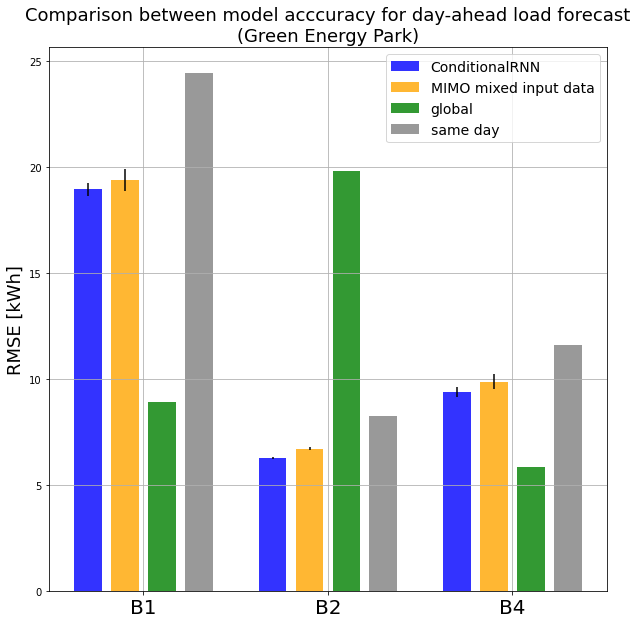

In [100]:
fig, ax = plt.subplots()
colors=["blue", "orange", "green", "grey"]
labels = ['ConditionalRNN', 'MIMO mixed input data', 'global', 'same day']
x = np.array(range(1,7,2))
for i,df in enumerate(datasets):
    means = df.groupby('B')['rmse'].mean()
    stds = df.groupby('B')['rmse'].std()
    #print(means)
    #print(stds)
    ax.bar(x-0.4, means, yerr=stds, alpha=0.8, width=0.3, label=labels[i], color=colors[i])
    x = x+0.4
#i = 3
#ax.bar(x-0.4, bench['rmse'], alpha=0.8, width=0.3, label=labels[i], color=colors[i])
plt.xticks(ticks=np.array(range(1,7,2))+0.2, labels=['B1','B2','B4'], fontsize=20)
plt.title('Comparison between model acccuracy for day-ahead load forecast\n(Green Energy Park)', fontsize=18)
plt.ylabel('RMSE [kWh]', fontsize=18)
plt.legend(fontsize=14)
plt.grid()
plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

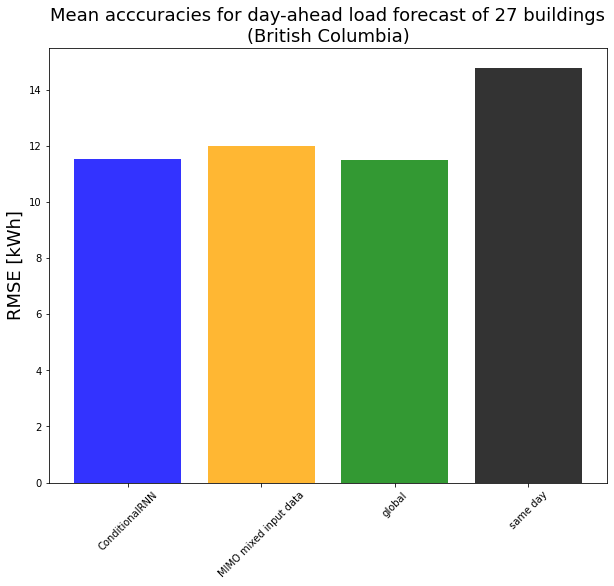

In [89]:
means = []
stds = []
datasets2 = [condRNN, MIMO_full, LSTM_global, bench]
#means.append(35.58681558224254)
#stds.append(0)
for df in datasets2:
    #means.append(df['mape'].mean())
    #stds.append(df['mape'].std())
    means.append(df['rmse'].mean())
    stds.append(df['rmse'].mean())
    
plt.rcParams['figure.figsize'] = (10, 8)
colors=["blue", "orange", "green", "black"]
labels = ['ConditionalRNN', 'MIMO mixed input data', 'global', 'same day']
#plt.grid(zorder=0)
plt.bar(range(len(means)), means, align='center', color=colors, alpha=0.8, zorder=1)
plt.xticks(ticks=range(len(means)), labels=labels,
           rotation=45)
plt.title('Mean acccuracies for day-ahead load forecast of 27 buildings\n(British Columbia)', fontsize=18)
plt.ylabel('RMSE [kWh]', fontsize=18)
plt.show()